<a target="_blank" href="https://colab.research.google.com/github/lm2612/Tutorials/blob/main/1_supervised_learning_regression/1-LinearRegression_HousePrice.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# House price prediction

In this exercise, we are going to apply a regression modelling technique to house price prediction using a subset of the [California house price dataset](https://www.kaggle.com/camnugent/california-housing-prices). Our dataset contains 200 observations for housing blocks in California obtained from the 1990 census. The dataset contains columns:

1. `longitude`: A measure of how far west a house is; a higher value is farther west

2. `latitude`: A measure of how far north a house is; a higher value is farther north

3. `housing_median_age`: Median age of a house within a block; a lower number is a newer building

4. `total_rooms`: Total number of rooms within a block

5. `total_bedrooms`: Total number of bedrooms within a block

6. `population`: Total number of people residing within a block

7. `households`: Total number of households, a group of people residing within a home unit, for a block

8. `median_income`: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. `median_house_value`: Median house value for households within a block (measured in US Dollars)

10. `ocean_proximity`: Location of the house w.r.t ocean/sea

In this example, we are going to create a regression model to predict `median_house_value`.

Load the  file `housing_short.csv` in the github repo.

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    filepath = "https://raw.githubusercontent.com/lm2612/Tutorials/refs/heads/main/1_supervised_learning_regression/housing_short.csv"
    print(f"Notebook running in google colab. Using raw github filepath = {filepath}")

else:
    filepath = "./housing_short.csv"
    print(f"Notebook running locally. Using local filepath = {filepath}")


Notebook running in google colab. Using raw github filepath = https://raw.githubusercontent.com/lm2612/Tutorials/refs/heads/main/1_supervised_learning_regression/housing_short.csv


In [5]:
df = pd.read_csv(filepath)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY


In [6]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

MessageError: Error: credential propagation was unsuccessful

Our goal is to predict `median_house_value`. This will be our dependent variable, $y$. In pandas, we select this column from our dataframe using `df["median_house_value"]`.

Pick another variable that you think will be a useful predictor of house value, that we will use as our dependent variable, $x$. First, we should check if these variables appear correlated by plotting them.

Text(0, 0.5, '$y$: median_house_value')

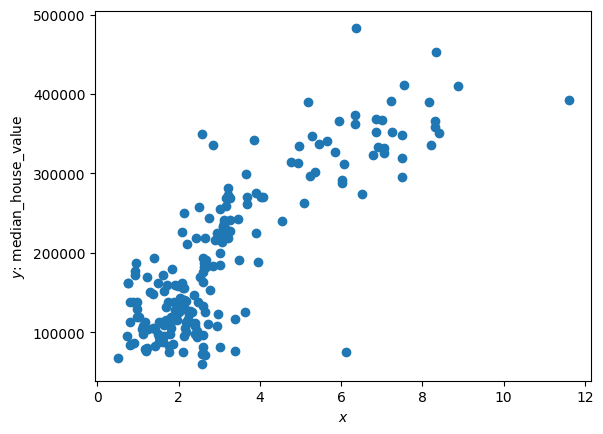

In [15]:
# Python scatter plot
plt.scatter(df["median_income"],    # Your choice of input variable to go here
            df["median_house_value"])
plt.xlabel("$x$")
plt.ylabel("$y$: median_house_value")

Does your choice of variable seem suitable for linear regression? You may want to try a few different variables until you are happy with your choice.

## Linear regression
Split the dataset into a suitable training, validation and test set.

<details><summary><b>Click for suggestion </b></summary>Try a 70% training, 30% validation and 20% test split. Decide on the indices you want and subset these in pandas. </details>
    
<details><summary><b>Click for pandas tip </b></summary>To index a pandas dataframe, look at df.iloc https://pandas.pydata.org/docs/user_guide/indexing.html. For example, to select indices 0 to 9, you would use df.iloc[0:10, :]. This is known as a 'slice' in Python. I suggest making your training, validation and testing dataframes are copies of the original using .copy(), to avoid issues later.</details>
    
  

In [23]:
# Number of observations = 200
# 70% = 0-140
# 20% = 140-180
# 10% = 180-200

training = df.iloc[0:140, :].copy()
validation = df.iloc[140:180, :].copy()
test = df.iloc[180:200, :].copy()

Next, we will build a linear regression model to predict median house value from median income using the training set.

### Building a linear regression model using scikit-learn
Look at `sklearn.linear_model.LinearRegression()` here: https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html.


Set X to your chosen input variable (I suggest `median_income`) and y to the output variable (`median_house_value`). You will need to reshape your input array to ensure they are of size `(N, 1)` for sklearn.

Fit the LinearRegression model and print the coefficients of the model.

In [29]:
# Set up X and y

X = training["median_income"]
y = training["median_house_value"]

X = X.iloc[:, ].values.reshape(-1, 1)      # This reshapes the array so the inputs are the correct size (N, 1)
y = y.iloc[:, ].values.reshape(-1, 1)


# Create your linear regression model and print the coefficients and intercept.

from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X,y)

print(reg.coef_)
print(reg.intercept_)



[[38948.54628248]]
[76003.84375679]


What does your model predict is the average increase in median house value associated with a \$10,000 increase in median income?

In [32]:
reg.predict(np.array([1E4]).reshape(-1,1)) - reg.predict(np.array([0]).reshape(-1,1))
# 1E4 = 10,000

# To calculate the slope m,
# 10,000 (the difference betwene prediction values) * m = value from above (v)
# m = v/10000
# m gives the rise in median house value with 10k rise in income

array([[3.89485463e+08]])

Plot the linear regression line on top of the training data. What does this suggest about the appropriateness of the model?

<details><summary><b>Click for suggestion </b></summary>To plot the linear model prediction, you can create a vector that covers the `x`-axis and estimate `y` at these points.</details>


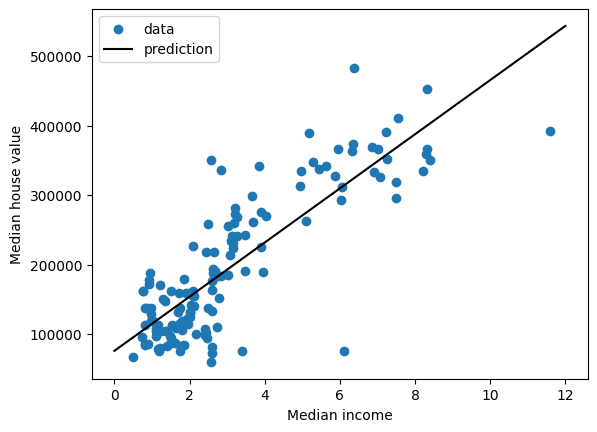

In [33]:
income = np.linspace(0, 12)
income = income.reshape(-1, 1)
price = reg.predict(income)

plt.scatter(training["median_income"], training["median_house_value"], label="data")
plt.plot(income, price, "black", label="prediction")
plt.xlabel("Median income")
plt.ylabel("Median house value")
plt.legend()

## Check validation dataset
The next step of our supervised learning recipe is validation. Predict the `median_house_value` on the the validation dataset. How can you check the performance?

<details><summary><b>Click for suggestion </b></summary>To check performance, what error metrics could you look at? What plot would you use to compare the true dataset against the predictions? </details>


In [34]:
X_validation = validation["median_income"].values.reshape(-1, 1)
y_validation = validation["median_house_value"].values.reshape(-1, 1)
y_pred_validation = reg.predict(X_validation)

# We will also check performance on the training dataset
y_pred_training = reg.predict(X)

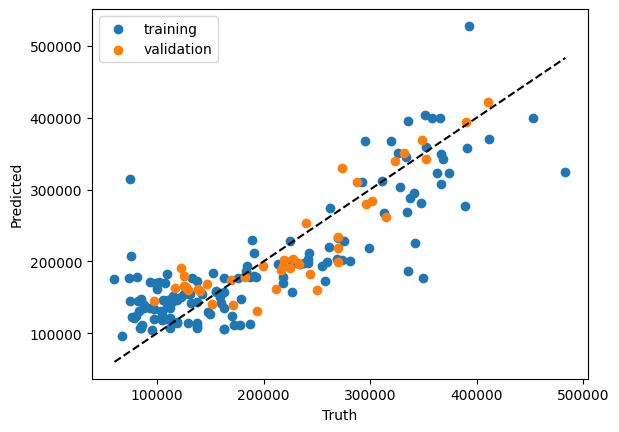

In [35]:
plt.scatter(y, y_pred_training, label="training")
plt.scatter(y_validation, y_pred_validation, label="validation")
plt.plot([min(y), max(y)], [min(y), max(y)], color="black", linestyle="dashed")
plt.xlabel("Truth")
plt.ylabel("Predicted")
plt.legend()

## Improving the model

Now fit a linear regression model to the training set of the form:

\begin{equation}
P_i = a + b_1 I_i + b_2 I_i^2
\end{equation}

where $P_i$ is median house price in block $i$ and $I_i$ is median house income of the same block.

In [37]:
# Create a new column in pandas for median income squared
training["median_income_2"] = training["median_income"]**2
y = training["median_house_value"]
X = training[["median_income", "median_income_2"]]
y = y.iloc[:, ].values.reshape(-1,1)

# Create regression model in same way as before
reg_2 = linear_model.LinearRegression()
reg_2.fit(X,y)

print(reg_2.coef_)
print(reg_2.intercept_)

[[63195.92025012 -2682.77770672]]
[39378.27235189]


Again plot the model fit for this model versus data. How does the fit compare with the linear model?

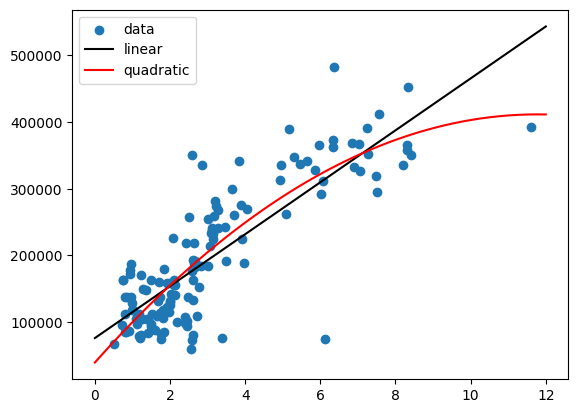

In [39]:
# Generate predicted price for quadratic model - we need to create X that includes X and X^2
income_ranges = pd.DataFrame({'median_income':income[:,0],
                              'median_income_2':income[:,0]**2})
price2 = reg_2.predict(income_ranges)

# plot over top of data
plt.scatter(training["median_income"], training["median_house_value"], label="data")
plt.plot(income, price, "black", label="linear")
plt.plot(income, price2, "red", label="quadratic")
plt.legend()

### Higher order polynomials.
Now fit a model using up to 5th order polynomial terms.

In [40]:
training["median_income_3"] = training["median_income"]**3
training["median_income_4"] = training["median_income"]**4
training["median_income_5"] = training["median_income"]**5

y = training["median_house_value"]
X = training[["median_income", "median_income_2", "median_income_3", "median_income_4", "median_income_5"]]
y = y.iloc[:, ].values.reshape(-1,1)

reg5 = linear_model.LinearRegression()
reg5.fit(X,y)

print(reg5.coef_)
print(reg5.intercept_)


[[-2.38761195e+05  1.43183836e+05 -2.93918952e+04  2.60822571e+03
  -8.42148207e+01]]
[235918.90032343]


Plot all three models on top of the training data.

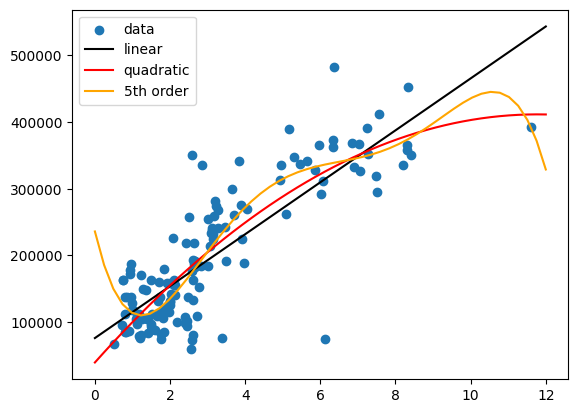

In [41]:
# generate predicted price for quadratic model
income_ranges = pd.DataFrame({'median_income':income[:,0],
                              'median_income_2':income[:,0]**2,
                              'median_income_3':income[:,0]**3,
                              'median_income_4':income[:,0]**4,
                              'median_income_5':income[:,0]**5})
price5 = reg5.predict(income_ranges)

# plot over top of data
plt.scatter(training["median_income"], training["median_house_value"], label="data")
plt.plot(income, price, "black", label="linear")
plt.plot(income, price2, "red", label="quadratic")
plt.plot(income, price5, "orange", label="5th order")
plt.legend()

Now we are going to prepare the fit of all models on the validation set. To do so, first use each of your fitted models to predict house prices in this set.

In [42]:
validation["median_income_2"] = validation["median_income"]**2
validation["median_income_3"] = validation["median_income"]**3
validation["median_income_4"] = validation["median_income"]**4
validation["median_income_5"] = validation["median_income"]**5

price = reg.predict(validation[["median_income"]])
price2 = reg_2.predict(validation[["median_income", "median_income_2"]])
price5 = reg5.predict(validation[["median_income", "median_income_2", "median_income_3","median_income_4", "median_income_5"]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Calculate the errors in prediction for each of the three models.

In [43]:
error = validation["median_house_value"] - price[:, 0]
error2 = validation["median_house_value"] - price2[:, 0]
error5 = validation["median_house_value"] - price5[:, 0]

Calculate the root mean squared error for each of the models:

\begin{equation}
\text{RMSE} = \sqrt{1/N\sum_{i=1}^N \text{error}_i^2}
\end{equation}

Which model has the best performance and why?

In [44]:
def rmse(errors):
  e = errors**2
  return np.sqrt(np.mean(e))

print("linear model RMSE:", rmse(error))
print("quadratic model RMSE:", rmse(error2))
print("5th power model RMSE:", rmse(error5))

linear model RMSE: 38517.816941766825
quadratic model RMSE: 37782.41946982851
5th power model RMSE: 38813.23981824909


In [ ]:
# Quadratic performs best- undefitting in linear and overfitting in 5th power

## Testing
Now we can move onto the final step of the supervised learning recipe: testing! Calculate the RMSE of prediction using the best performing model on the testing set.

In [46]:
test["median_income_2"] = test["median_income"]**2

price2 = reg_2.predict(test[["median_income", "median_income_2"]])

error2 = test["median_house_value"] - price2[:, 0]
print(rmse(error2))

74903.53093802916


Why is the performance so much worse on the testing set?

Plot house price versus income for each of the three datasets and comment on this.

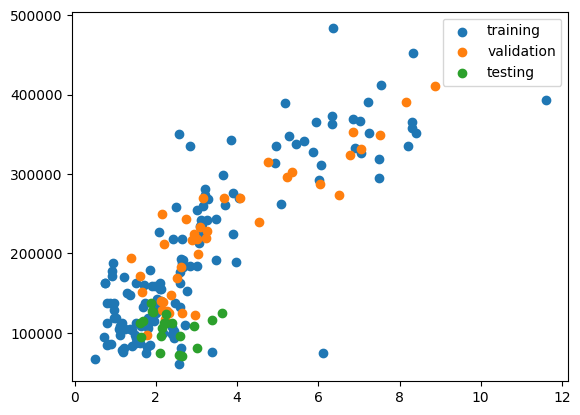

In [47]:
plt.scatter(training["median_income"], training["median_house_value"], label="training")
plt.scatter(validation["median_income"], validation["median_house_value"], label="validation")
plt.scatter(test["median_income"], test["median_house_value"], label="testing")

plt.legend()

In [ ]:
# While the training and validation set are similar, the testing set does not represent the overall distribution.
# It is imp for all three sets to look similar to build a generalised models

## Multivariate regression
What about if you chose a different variable? How would you implement the above for multivariate regression?

We will choose the continous variables only.

In [49]:
multivariate_columnnames = [ 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']
X = training[multivariate_columnnames].values
# No need to edit y. Check the sizes
X.shape, y.shape

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY


When using multiple regression inputs, we need to scale variables first, otherwise those with larger values have large magnitudes (e.g., population) would be given a higher weighting than those with smaller magnitudes (e.g., houseing median age). Use [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to do this.

In [51]:
from sklearn.preprocessing import StandardScaler

# Use StandardScaler to fit and transform your X data so the variables are normalised to zero mean, unit variance
scaler_X = StandardScaler()
scaler_X.fit(X)

# You can also scale y if you would like.
scaler_y = StandardScaler()
scaler_y.fit(y)

X_scaled = scaler_X.transform(X)
y_scaled = scaler_y.transform(y)

In [52]:
# Fit your linear regression model in the same way but using the multivariate X

reg_mv = linear_model.LinearRegression()
reg_mv.fit(X_scaled, y_scaled)

LinearRegression()

What is the most important predictor?


In [53]:
print(reg_mv.coef_)
print(reg_mv.intercept_)

[[ 0.00495246  0.30401002 -0.36986811 -0.53481245  0.79657647  0.74033229]]
[-1.79437246e-16]


How do the errors compare to the univariate prediction?

In [54]:
X_validation_mv = validation[multivariate_columnnames].values
X_validation_mv_scaled = scaler_X.transform(X_validation_mv)

y_pred_mv_validation = scaler_y.inverse_transform(reg_mv.predict(X_validation_mv_scaled))
error_mv = y_validation - y_pred_mv_validation
print(rmse(error_mv), rmse(error))

31119.06279261825 38517.816941766825


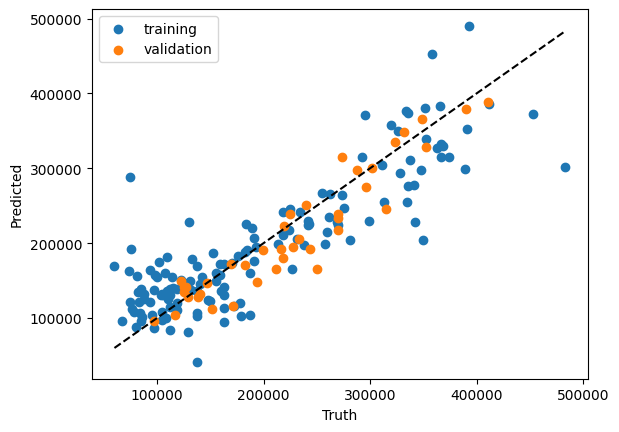

In [55]:
plt.scatter(y,  scaler_y.inverse_transform(reg_mv.predict(X_scaled)), label="training")
plt.scatter(y_validation, y_pred_mv_validation, label="validation")
plt.plot([min(y), max(y)], [min(y), max(y)], color="black", linestyle="dashed")

plt.xlabel("Truth")
plt.ylabel("Predicted")
plt.legend()

## Bonus question: Regularisation
Train a model that uses the L2 regularisation method (Ridge regression). Check the effect this has on the values of the coefficients and on the accuracy on the validation set

In [58]:
reg_ridge = linear_model.Ridge()

reg_ridge.fit(X_scaled, y_scaled)
# print coefficients of model
print(reg_ridge.coef_)
print(reg_ridge.intercept_)

[ 1.08121375e-03  2.77257874e-01  5.17376966e-04 -4.57306786e-01
  3.73203703e-01  7.51335009e-01]
[-2.26340997e-16]


In [62]:
y_pred_ridge_validation = scaler_y.inverse_transform(reg_ridge.predict(X_validation_mv_scaled))
error_ridge = y_validation - y_pred_ridge_validation
print(rmse(error_ridge))

ValueError: Expected 2D array, got 1D array instead:
array=[ 1.45110266  1.35896586 -0.02712827  0.09161287  0.72947959  1.17864702
 -0.02589157 -0.06147261  0.53847985  0.38581712  0.98633981  0.17368612
  0.48574955  1.81237867  1.93402255  1.27290289  0.959003    1.6481663
 -0.0332493  -0.3563011  -0.15475886  0.30696178  0.28388162  0.37767807
 -0.28139865 -0.73771743 -0.44789197 -0.53146886 -0.88912372 -0.52963437
 -0.63857102 -0.80170592 -0.8103624  -0.54220928 -0.63736955 -0.57096335
 -0.23999459 -0.46474419 -0.42014392 -0.19976449].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [61]:
plt.scatter(y,  scaler_y.inverse_transform(reg_ridge.predict(X_scaled)), label="training")
plt.scatter(y_validation, y_pred_ridge_validation, label="validation")
plt.plot([min(y), max(y)], [min(y), max(y)], color="black", linestyle="dashed")

plt.xlabel("Truth")
plt.ylabel("Predicted")
plt.legend()

ValueError: Expected 2D array, got 1D array instead:
array=[ 1.73185844  2.42572694  1.40225944  0.80224846  0.2914228   0.2623274
  0.26591661  0.28604988 -0.27744987  0.33631981  0.06746838  0.23955585
  0.00457809 -0.21965325 -0.29364556 -0.50283906 -0.11110468 -0.40339835
 -0.38737046 -0.24282895 -0.7211489  -0.61391559 -0.39654181 -0.42562397
 -0.18981918 -0.38207876 -0.34153839 -0.630098   -0.59306824 -0.61152325
 -0.41902319 -0.53070348 -0.63483425 -0.62880122 -0.13247973 -0.60468654
 -0.83007645 -0.68310109  0.0887943  -0.15398694 -0.4582184  -0.70488543
 -0.86003531  0.20676906 -0.07293449 -0.09636958 -0.43100634 -0.56403092
 -0.90449589 -0.57024733 -0.81363441 -0.69917057 -0.93224656 -0.92144955
 -0.70549059 -0.73584955 -0.63871473 -0.92298548 -1.0131469  -0.29877495
 -0.03453138  0.89675722 -0.89668569 -0.7756325  -0.30002609 -0.86317083
 -0.8892435  -0.31698746 -0.56886979 -1.07035705 -0.60376646 -0.91881217
 -0.69852545 -1.02810059 -0.25986386 -0.76368841 -0.19194505 -0.91551415
 -1.0481103  -0.47060682 -0.6664877  -0.8348943  -0.66725138 -0.94644136
 -0.568147   -0.3819173  -0.7373469  -0.8401248  -0.89971778 -0.52033895
 -1.46587898 -1.03092478 -0.31900111 -0.75704463  0.30374075  0.35210647
 -0.50052073 -0.30019567  0.03389956  0.11941972  0.66005392 -0.01102122
  0.07517184  0.75069643  0.54029505  0.26866058  0.16076825  0.48204862
  0.48116089  0.6846193   0.14928926  0.55834766  0.18369305  0.24260593
  0.03571562  0.40171526  0.41399318  0.96930559  0.92332846  1.15447506
  0.55432579  1.15464517  0.96981682  1.51077839  1.17549064  1.68322876
  1.14054786  1.84692649  1.04367648  1.48213844  2.91543015  1.59397928
  1.74356382  1.73703949  1.81840442  1.29456891  1.82195655  1.32789674
  1.28894816  1.01019278].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.